In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Setup: Load standard datasets for demonstration
tips = sns.load_dataset("tips")
penguins = sns.load_dataset("penguins").dropna()
anscombe = sns.load_dataset("anscombe")


# Common Pitfalls

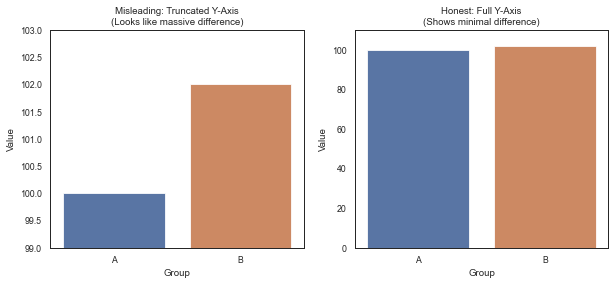

In [35]:
# Truncated Axes
# Exaggerating differences by cutting the Y-axis

def plot_truncated_axis():
    df = pd.DataFrame({'Group': ['A', 'B'], 'Value': [100, 102]})
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # BAD: Truncated
    sns.barplot(data=df, x='Group', y='Value', ax=ax[0], hue="Group", legend=False)
    ax[0].set_ylim(99, 103) # <--- THE LIE
    ax[0].set_title("Misleading: Truncated Y-Axis\n(Looks like massive difference)")
    
    # GOOD: Full Scale
    sns.barplot(data=df, x='Group', y='Value', ax=ax[1], hue="Group", legend=False)
    ax[1].set_ylim(0, 110)
    ax[1].set_title("Honest: Full Y-Axis\n(Shows minimal difference)")
    plt.show()

plot_truncated_axis()


# Fundamentals & Aesthetics

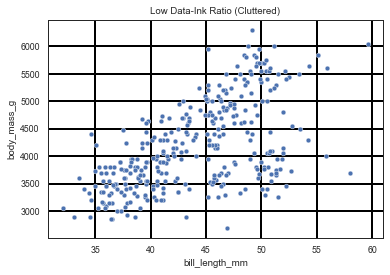

In [36]:
# Aesthetics and Data-Ink Ratio [cite: 146]
# Tufte's Principle: Remove everything that isn't data.

# Standard "Busy" Plot
plt.figure(figsize=(6, 4))
plt.grid(True, which='both', color='black', linestyle='-', linewidth=2) # Heavy grid (Bad)
sns.scatterplot(data=penguins, x="bill_length_mm", y="body_mass_g")
plt.title("Low Data-Ink Ratio (Cluttered)")
plt.show()


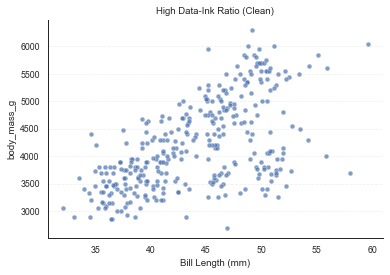

In [37]:

# Cleaned "Tufte" Style Plot
sns.set_theme(style="white", context="paper") # Clean background
plt.figure(figsize=(6, 4))
sns.scatterplot(data=penguins, x="bill_length_mm", y="body_mass_g", alpha=0.7)
sns.despine() # Remove top and right spines 
plt.grid(True, axis='y', alpha=0.3, ls='--') # Minimal grid
plt.title("High Data-Ink Ratio (Clean)")
plt.xlabel("Bill Length (mm)") # Adding units
plt.show()


# Multivariate Exploration

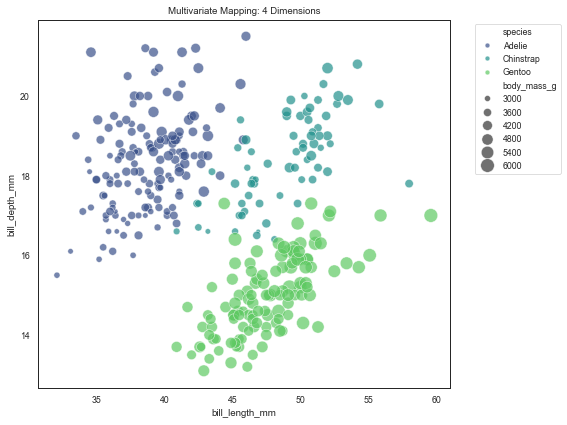

In [38]:

# 4 Variables in one plot: x, y, hue, size

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins,
    x="bill_length_mm", 
    y="bill_depth_mm",
    hue="species",      # Variable 3: Categorical -> Color [cite: 194]
    size="body_mass_g", # Variable 4: Quantitative -> Size [cite: 193]
    palette="viridis",  # Accessible palette [cite: 155]
    alpha=0.7,
    sizes=(20, 200)
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Multivariate Mapping: 4 Dimensions")
plt.tight_layout()
plt.show()


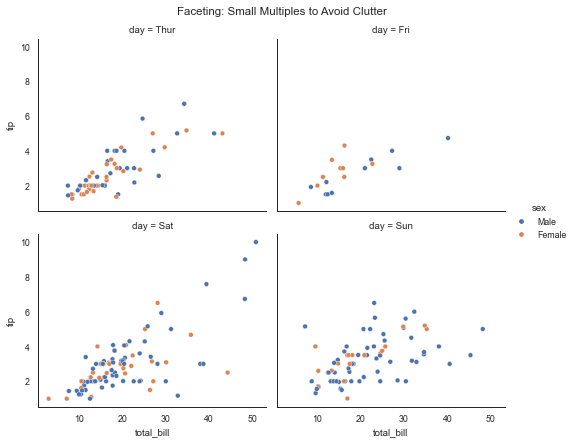

In [39]:
# Escaping the Spaghetti Plot via Faceting
# Faceting splits the chart into a grid to reduce cognitive load.

g = sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    col="day",          # Facet by Day
    hue="sex",          # Color by Sex
    kind="scatter",
    col_wrap=2,
    height=3, aspect=1.2
)
g.fig.suptitle("Faceting: Small Multiples to Avoid Clutter", y=1.02)
plt.show()


# Distributions, Uncertainty & Modeling

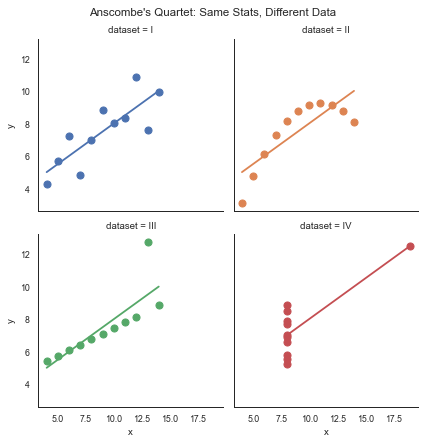

In [40]:


# Anscombe's Quartet

g = sns.lmplot(
    data=anscombe, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, ci=None, height=3,
    scatter_kws={"s": 50, "alpha": 1}
)
g.fig.suptitle("Anscombe's Quartet: Same Stats, Different Data", y=1.02)
plt.show()


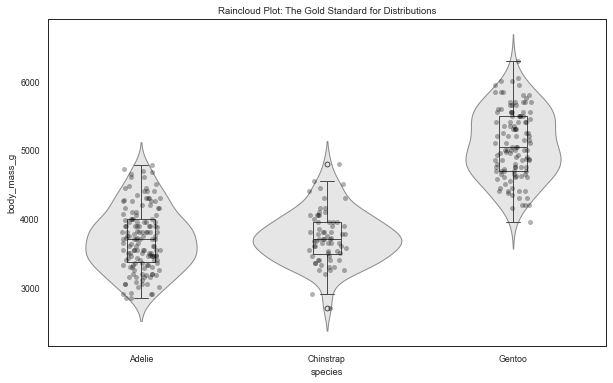

In [41]:
# The "Raincloud"
# Combining Violin (Shape), Strip (Raw Data), and Box (Summary).

f, ax = plt.subplots(figsize=(10, 6))

# Layer 1: Violin (Density)
sns.violinplot(data=penguins, x="species", y="body_mass_g", 
               color=".9", inner=None, ax=ax)

# Layer 2: Strip (Raw Data - "The Rain")
sns.stripplot(data=penguins, x="species", y="body_mass_g", 
              color="black", alpha=0.3, jitter=True, ax=ax)

# Layer 3: Boxplot (Summary stats)
sns.boxplot(data=penguins, x="species", y="body_mass_g", 
            width=0.15, boxprops={'zorder': 2, 'facecolor':'none'}, ax=ax)

ax.set_title("Raincloud Plot: The Gold Standard for Distributions")
plt.show()


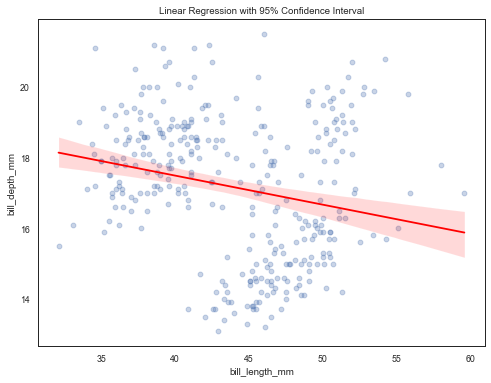

In [42]:
# Visualizing Regression Models
# Plotting the model fit + confidence band + raw data.

plt.figure(figsize=(8, 6))
sns.regplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    scatter_kws={'alpha': 0.3}, # Best Practice: Fade points
    line_kws={'color': 'red'}   # Contrast the model line
)
plt.title("Linear Regression with 95% Confidence Interval")
plt.show()


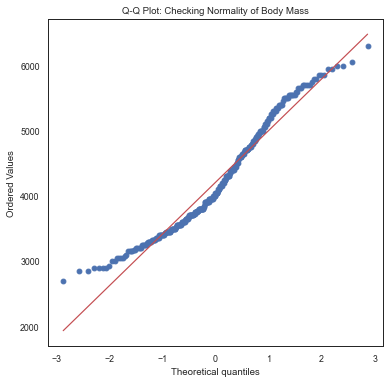

In [43]:

# Checking Assumptions: Q-Q Plot
# Is our data normal?

fig, ax = plt.subplots(figsize=(6, 6))
res = stats.probplot(penguins['body_mass_g'], plot=ax)
ax.set_title("Q-Q Plot: Checking Normality of Body Mass")
plt.show()